## 本项目是贷前的信用风险模型(A卡)实战项目

### 1.导入库

In [1]:
import pandas as pd
import numpy as np

# 可视化
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud
from matplotlib.font_manager import FontProperties
# styling
%matplotlib inline
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'

import os
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

### 2.阅读和理解数据

In [2]:
#读取数据
data_original =  pd.read_csv("data/credit_risk_dataset.csv") 
data = pd.read_csv("data/credit_risk_dataset.csv") 

data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


#### 介绍下字段含义：
* person_age：年龄；  
* person_income：年收入；  
* person_home_ownership：房屋所有权类型：
    - MORTGAGE：有抵押贷款；
    - RENT:租用；
    - OWN：个人完全拥有他们的房子。
    - other：其他类别。
* person_emp_length：工作年限（年）；  
* loan_intent：贷款原因
    - EDUCATION：教育
    - MEDICAL：医疗
    - VENTURE：创业 / 风险投资
    - PERSONAL：个人
    - DEBT CONSOLIDATION：债务整合
    - HOME IMPROVEMENT：房屋改善
* **loan_grade：贷款等级；根据借款人的信誉分配给贷款的等级。可由业务规则或者模型得出该等级。**  
    - A：借款人的信誉度高，说明风险低。  
    - B：借款人的风险相对较低，但信誉度不如A级。  
    - C：借款人的信誉一般。  
    - D：借款人被认为比以前的等级有更高的风险。  
    - E：借款人的信誉越低，说明风险越大。  
    - F：借款人有很大的信用风险。  
    - G：借款人的信誉最低，意味着风险最高。  
* loan_amnt：贷款金额；  
* loan_int_rate：贷款利率(%)；   
* **loan_status:贷款状态（0 为非违约 1 为违约）;**     
* loan_percent_income:贷款收入百分比；   
* cb_person_default_on_file：历史是否违约； 
    - Y:有违约记录；  
    - N:无违约记录；  
* cb_person_cred_hist_length：信用历史长度；  

### 3.数据探索,即EDA(exploratory data analysis )

In [3]:
# 可得：1.有12列，32581行；2.每列的数据类型；3.是否有空值：person_emp_length，
# loan_int_rate这两列有空值。其他列无空值。
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
# 得出具体空值个数
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [5]:
#计算每列唯一值的个数，对每列的重复值有个大致的概念。注意函数里的dropna：可选参数；
# 默认为True，会在计算唯一值数量前先排除空值，所以这里空值不计算。
data.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [6]:
# 看贷款违约和未违约的人数及占比
print(data['loan_status'].value_counts())
print(data['loan_status'].value_counts(normalize=True))

0    25473
1     7108
Name: loan_status, dtype: int64
0    0.781836
1    0.218164
Name: loan_status, dtype: float64


Text(0.5, 1.0, 'Correlation Matrix')

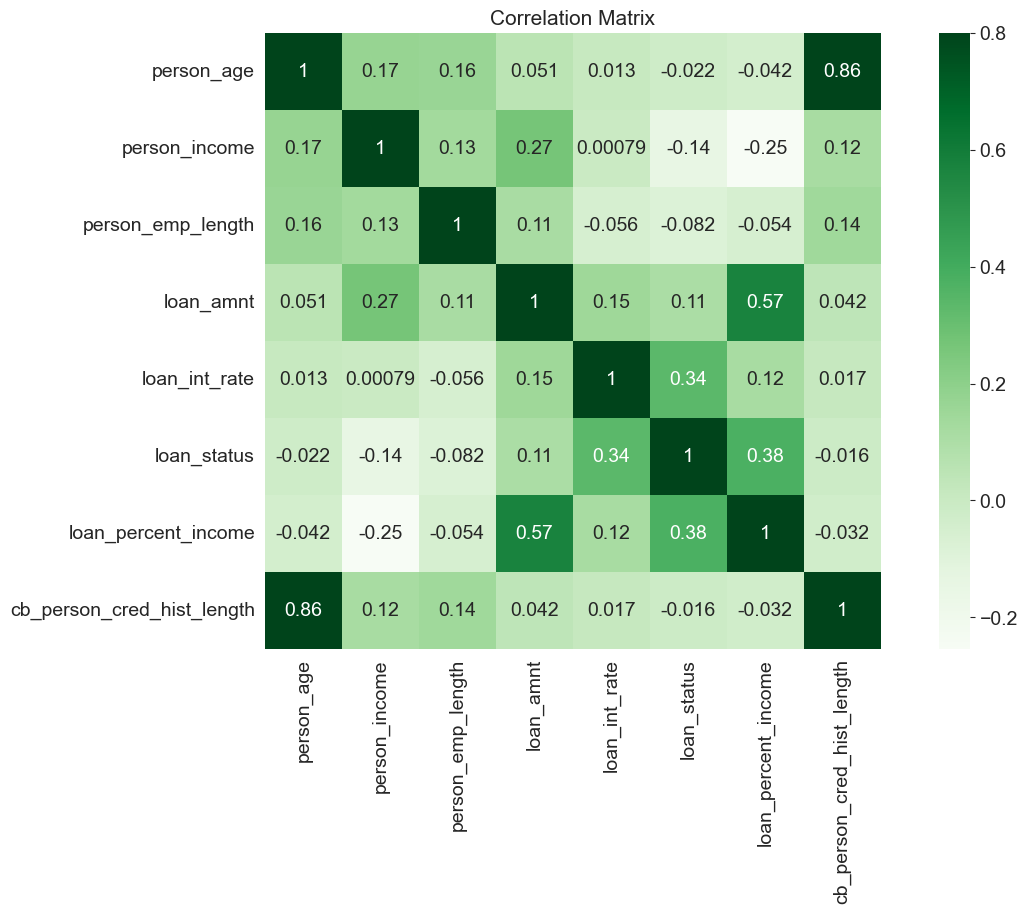

In [7]:
# 绘制相关性矩阵。
# subplots()函数没有指定参数，因此默认只创建一个子图。fig变量代表整个图像，而ax变量则代表图像中的绘图区域。
fig, ax = plt.subplots() 
fig.set_size_inches(15,8)
# corr()计算了输入数据集data中所有数值列的相关系数矩阵；vmax = .8指定了图中颜色强度的最大值。
# square = True使得每个单元格的宽高比为1，即呈现为正方形；annot = True会直接标注出对应的相关系数值。
# cmap='Greens'指定了颜色映射方案为绿色系。
sns.heatmap(data.corr(), vmax =.8, square = True, annot = True,cmap='Greens' )
# Correlation Matrix：相关性矩阵
plt.title('Correlation Matrix',fontsize=15)

通过上述热力图，可得年龄(person_age)和信用历史长度(cb_person_cred_hist_length)强相关(系数0.86)，这符合常识，年纪越大，有信用卡等贷款的时间也会相应多一些。
还有贷款金额和贷款收入百分比有较强相关性(0.57),这也能理解，前者就是后者的分子。
做这个相关性分析，可为后续在使用具体的机器学习算法时提供参考。比如回归类算法就要求特征之间不能有强相关性，所以如果用就要对强相关的特征做处理。而像XGB这类模型就没有这个要求。

In [8]:
from IPython.core.display import HTML
# 用于将多个IPyTable对象合并显示在一个HTML表格中，每个IPyTable对象占据一个单元格
def multi_table(table_list):
        return HTML('<table><tr style="background-color:#ddefdd;">' +  ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +'</tr></table>')
    

In [9]:
nunique_df={
    # 使用了“字典推导式”，生成了的列名：计数值。再放到nunique_df的字典里
    var:pd.DataFrame(data[var].value_counts())
           for var in {
               'person_age', 'person_income', 'person_home_ownership',
               'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
               'loan_int_rate', 'loan_status', 'loan_percent_income',
               'cb_person_default_on_file', 'cb_person_cred_hist_length'
                      }
            }
# multi_table函数用于展示和并排展示多个表格。
multi_table([nunique_df['person_age'],nunique_df['person_income']
            ,nunique_df['person_home_ownership'],nunique_df['person_emp_length']
            ,nunique_df['loan_intent'],nunique_df['loan_grade'],nunique_df['loan_amnt']
            ,nunique_df['loan_int_rate'],nunique_df['loan_status'],nunique_df['loan_percent_income']
            ,nunique_df['cb_person_default_on_file'],nunique_df['cb_person_cred_hist_length']])

,person_age
23,3889
22,3633
24,3549
25,3037
26,2477
27,2138
28,1854
29,1687
30,1316
21,1229


#### 3.2单变量分析

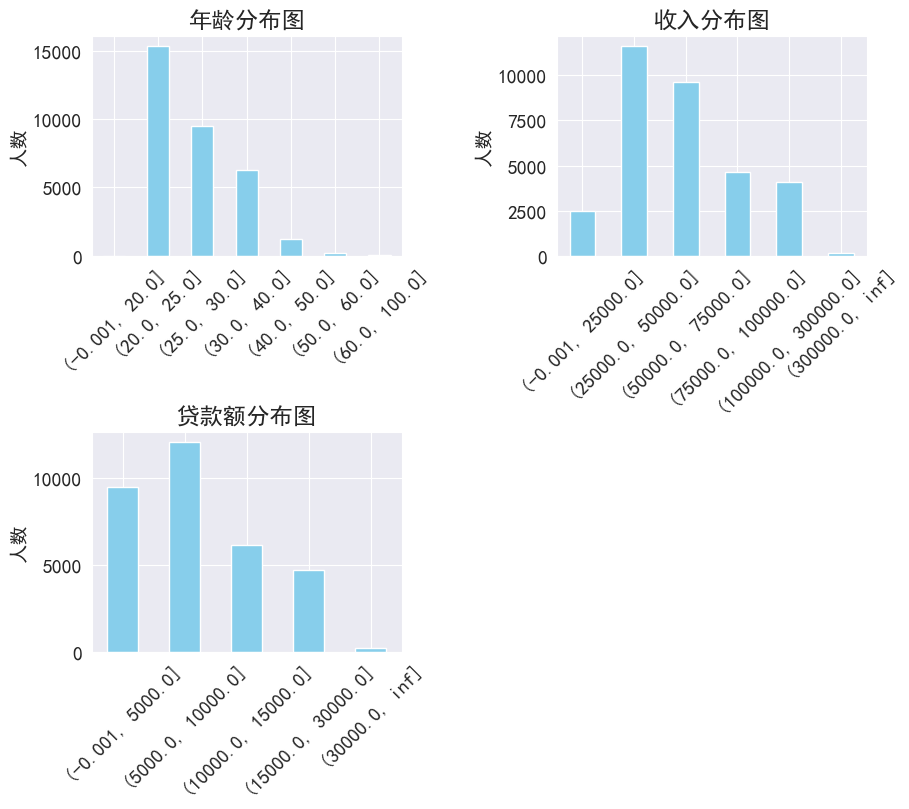

In [10]:
df = pd.DataFrame(data)
# 定义列的分段区间.每个区间左闭右开，可以根据需要调整
age_bins = [0, 20, 25, 30, 40, 50, 60, 100]
income_bins = [0, 25000, 50000, 75000, 100000, 300000,float('inf')] # float('inf')表示无穷大
loan_amnt_bins = [0, 5000, 10000, 15000, 30000, float('inf')]                     
# 使用cut函数分组
df['age_group'] = pd.cut(df['person_age'], bins=age_bins, right=True, include_lowest=True)
df['income_group'] = pd.cut(df['person_income'], bins=income_bins, right=True, include_lowest=True)
df['loan_amnt_group'] = pd.cut(df['loan_amnt'], bins=loan_amnt_bins, right=True, include_lowest=True)
# 计算各分段人数
age_counts = df['age_group'].value_counts().sort_index()
income_counts =  df['income_group'].value_counts().sort_index()
loan_amnt_counts = df['loan_amnt_group'].value_counts().sort_index()
# 绘制柱状图
plt.rcParams['font.sans-serif'] = ['SimHei']  # 选择一种中文字体，这里以黑体为例
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
plt.figure(figsize=(10, 8))  #设置为 10英寸宽，8英寸高
# 调整子图间距
plt.subplots_adjust(hspace=0.8, wspace=0.5)  # hspace 调整垂直间距，wspace 调整水平间距

plt.subplot(221)  #两行两列，占据第1个位置
age_counts.plot(kind='bar', color='skyblue')
plt.title('年龄分布图')
# plt.xlabel('年龄段')
plt.ylabel('人数')
plt.xticks(rotation=45)  # 旋转x轴标签，避免重叠
# plt.tight_layout()  # 自动调整子图参数, 使之填充整个图像区域

plt.subplot(222)  #两行两列，占据第2个位置
income_counts.plot(kind='bar', color='skyblue')
plt.title('收入分布图')
# plt.xlabel('收入分段')
plt.ylabel('人数')
plt.xticks(rotation=45)  # 旋转x轴标签，避免重叠

plt.subplot(223)  #两行两列，占据第3个位置
loan_amnt_counts.plot(kind='bar', color='skyblue')
plt.title('贷款额分布图')
# plt.xlabel('贷款额分段')
plt.ylabel('人数')
plt.xticks(rotation=45)  # 旋转x轴标签，避免重叠
# 显示图表
plt.show()

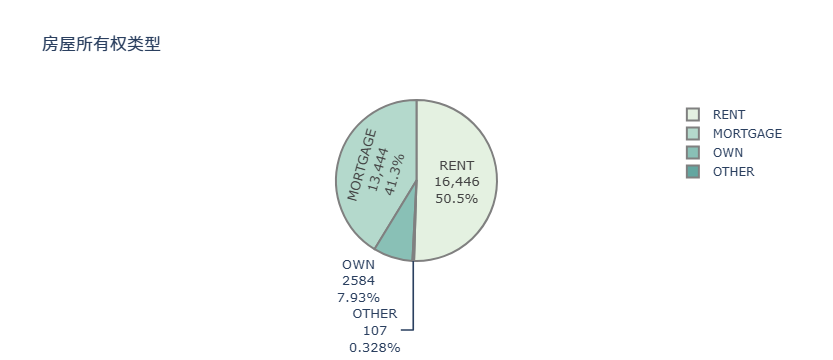

In [11]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
# 计算person_home_ownership列值计数，即每种房屋所有权状态出现的次数
level_counts=data.person_home_ownership.value_counts()
# 创建一个饼图对象fig
fig=px.pie(values=level_counts.values,
          names=level_counts.index,
          color_discrete_sequence=px.colors.sequential.Mint,
          title= '房屋所有权类型'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#102000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

#### 观察上述饼图，一半人是租房的，剩下买房的人中有80%以上是贷款买。

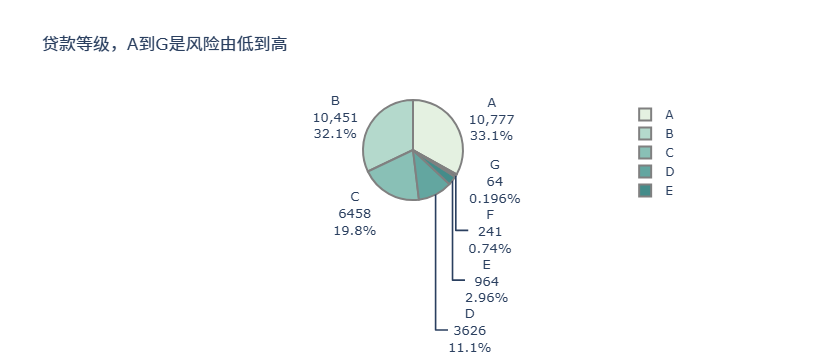

In [12]:
level_counts=data.loan_grade.value_counts()
fig=px.pie(values=level_counts.values,
          names=level_counts.index,
          color_discrete_sequence=px.colors.sequential.Mint,
          title= '贷款等级，A到G是风险由低到高'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#102000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

#### 风险越低的人数越多，反之风险越高人越少。符合常识。

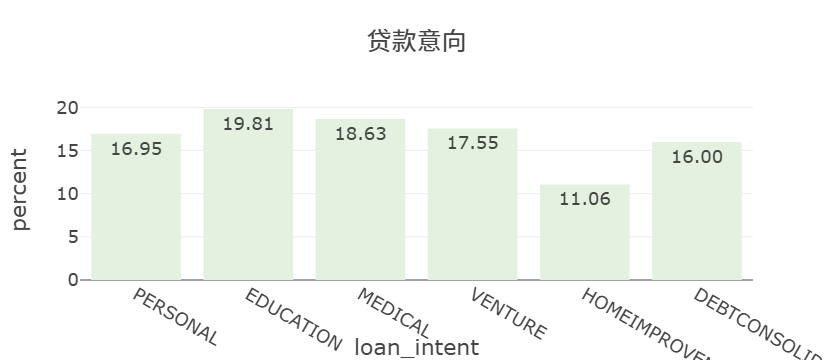

In [13]:
fig=px.histogram(data, x = 'loan_intent',histnorm = 'percent', text_auto = '.2f',template = 'presentation', title = '贷款意向',color_discrete_sequence=px.colors.sequential.Mint)
fig.update_layout()
fig.show()

#### 贷款意向的分配很平均。各种类型的人数相差不大。

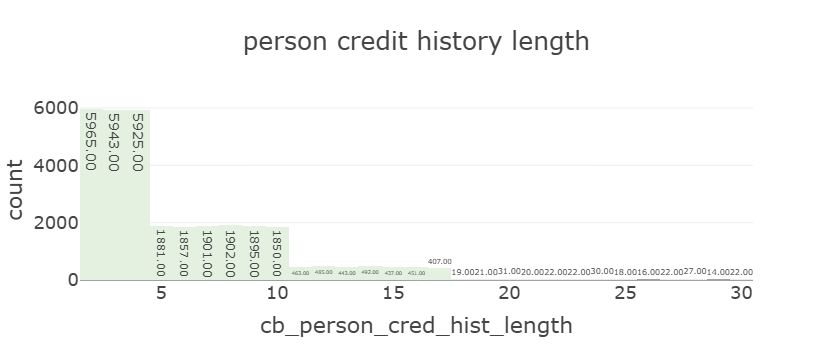

In [14]:
fig=px.histogram(data, x = 'cb_person_cred_hist_length', text_auto = '.2f',template = 'presentation', title = 'person credit history length',color_discrete_sequence=px.colors.sequential.Mint)
fig.update_layout()
fig.show()

#### 也是信用历史越长的人数越低。绝大部分都是不超过5期的信贷新人。

### 4.数据预处理（清洗）

#### 4.1空值处理

In [15]:
# 去除空值,记得直接修改数据inplace=True.直接删除是最简单的一种办法，记住还有其他很多处理空值的办法。
data.dropna(inplace=True)
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
age_group                     0
income_group                  0
loan_amnt_group               0
dtype: int64

#### 4.2 极值处理

In [16]:
# 通过查看最大、小值，至少能看出年龄、工作年限的最大值不符合事实。
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28634.000000,2.863400e+04,28634.000000,28634.000000,28634.000000,28634.000000,28634.000000,28634.000000
mean,27.711706,6.643063e+04,4.788573,9656.577845,11.039718,0.216631,0.169501,5.793392
std,6.171993,5.155102e+04,4.154660,6329.645284,3.229540,0.411956,0.106387,4.037040
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.946200e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.590000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,84.000000,2.039784e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [17]:
(data['person_age']>=80).sum()
# data[data['person_age']>=80].shape[0]

2

In [18]:
(data['person_emp_length']>=50).sum()

2

In [19]:
# 去除极值
data.drop(data[(data['person_age'] > 80) | (data['person_age'] < 20)].index, axis=0,inplace=True)
data.drop(data[data['person_emp_length'] > 50].index, axis=0,inplace=True)
# data.drop(columns=['level_0', 'index'],inplace=True)
# 之前的索引已经被删除弄的不连续了，重置索引
data.reset_index(drop=True,inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28631 entries, 0 to 28630
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  28631 non-null  int64   
 1   person_income               28631 non-null  int64   
 2   person_home_ownership       28631 non-null  object  
 3   person_emp_length           28631 non-null  float64 
 4   loan_intent                 28631 non-null  object  
 5   loan_grade                  28631 non-null  object  
 6   loan_amnt                   28631 non-null  int64   
 7   loan_int_rate               28631 non-null  float64 
 8   loan_status                 28631 non-null  int64   
 9   loan_percent_income         28631 non-null  float64 
 10  cb_person_default_on_file   28631 non-null  object  
 11  cb_person_cred_hist_length  28631 non-null  int64   
 12  age_group                   28631 non-null  category
 13  income_group    

In [20]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28631.000000,2.863100e+04,28631.000000,28631.000000,28631.000000,28631.000000,28631.000000,28631.000000
mean,27.710174,6.642551e+04,4.780413,9655.319409,11.039825,0.216618,0.169491,5.792917
std,6.163125,5.154808e+04,4.035653,6327.908887,3.229398,0.411948,0.106362,4.035769
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.945600e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.590000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,80.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [23]:
# 将之前单变量分析中增加的列去除
data.drop(columns=['age_group', 'income_group', 'loan_amnt_group'],inplace=True)
# 重置索引
data = data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28631 entries, 0 to 28630
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28631 non-null  int64  
 1   person_income               28631 non-null  int64  
 2   person_home_ownership       28631 non-null  object 
 3   person_emp_length           28631 non-null  float64
 4   loan_intent                 28631 non-null  object 
 5   loan_grade                  28631 non-null  object 
 6   loan_amnt                   28631 non-null  int64  
 7   loan_int_rate               28631 non-null  float64
 8   loan_status                 28631 non-null  int64  
 9   loan_percent_income         28631 non-null  float64
 10  cb_person_default_on_file   28631 non-null  object 
 11  cb_person_cred_hist_length  28631 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.6+ MB


#### 4.3 分箱

这里使用分箱方法中的“等宽分箱”法。其实也不完全是等宽，而是自定义了每个区间。不用“等频分箱”法的原因是这样出来的区间在业务上较难解释。

In [24]:
# 给连续数值分组：年龄
data['age_group'] = pd.cut(data['person_age'],
                           bins=[20, 26, 36, 46, 56, 66, 81],
                           labels=['20-25', '26-35', '36-45', '46-55', '56-65', '66-80'])
data['age_group'].dtype

CategoricalDtype(categories=['20-25', '26-35', '36-45', '46-55', '56-65', '66-80'], ordered=True)

In [25]:
# 给连续数值分组：年收入
data['income_group'] = pd.cut(data['person_income'],
                              bins=[0, 25000, 50000, 75000, 100000, float('inf')],
                              labels=['low', 'low-middle', 'middle', 'high-middle', 'high'])
data['income_group']

0                low
1                low
2             middle
3             middle
4                low
            ...     
28626         middle
28627           high
28628    high-middle
28629           high
28630     low-middle
Name: income_group, Length: 28631, dtype: category
Categories (5, object): ['low' < 'low-middle' < 'middle' < 'high-middle' < 'high']

In [26]:
# 给连续数值分组：贷款金额
data['loan_amount_group'] = pd.cut(data['loan_amnt'],
                                   bins=[0, 5000, 10000, 15000, float('inf')],
                                   labels=['small', 'medium', 'large', 'very large'])
data['loan_amount_group']

0             small
1            medium
2        very large
3        very large
4             small
            ...    
28626        medium
28627    very large
28628    very large
28629         large
28630        medium
Name: loan_amount_group, Length: 28631, dtype: category
Categories (4, object): ['small' < 'medium' < 'large' < 'very large']

In [27]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'age_group',
       'income_group', 'loan_amount_group'],
      dtype='object')

#### 4.4 类别特征数值化：
具体采用哪种数值化的方法和特征本身有关，也和算法有关。比如在这里的贷款等级是有内在顺序关系的。而房屋所有权类型、贷款原因、是否违约就没有内在顺序联系。下面是几个方法的适用场景：
- One-Hot 编码：适用于名义变量，即没有内在顺序关系的分类。
- Label Encoding：适用于有序变量，给每个类别分配一个整数标识符。
- Ordinal Encoding：当类别之间存在明确的顺序时使用，比如教育水平（小学、中学、大学等）。
- Target Encoding/Weight of Evidence (WoE)：基于目标变量来编码类别特征，适合于有监督学习任务。

> 记住，分箱后的特征也变成了类别特征，也需要进行数值化操作。

##### 4.4.1 采用独热编码

In [28]:
from sklearn.preprocessing import OneHotEncoder
ohe_columns = ['person_home_ownership','loan_intent','cb_person_default_on_file']
ohe = OneHotEncoder()
ohe.fit(data[ohe_columns])
ohe.categories_

[array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object),
 array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'PERSONAL', 'VENTURE'], dtype=object),
 array(['N', 'Y'], dtype=object)]

将独热编码列合并到源数据集里，并删除原来的数据列：

In [29]:
ohe_data = ohe.transform(data[ohe_columns]).toarray()
# 将独热编码结果转换为 DataFrame
ohe_df = pd.DataFrame(ohe_data, columns=ohe.get_feature_names_out(ohe_columns))
# 合并新的特征到原始数据集中
data = pd.concat([data, ohe_df], axis=1)

In [30]:
# 删除原始数据集中的未编码列
data.drop(columns=ohe_columns, inplace=True)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28631 entries, 0 to 28630
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   person_age                      28631 non-null  int64   
 1   person_income                   28631 non-null  int64   
 2   person_emp_length               28631 non-null  float64 
 3   loan_grade                      28631 non-null  object  
 4   loan_amnt                       28631 non-null  int64   
 5   loan_int_rate                   28631 non-null  float64 
 6   loan_status                     28631 non-null  int64   
 7   loan_percent_income             28631 non-null  float64 
 8   cb_person_cred_hist_length      28631 non-null  int64   
 9   age_group                       28617 non-null  category
 10  income_group                    28631 non-null  category
 11  loan_amount_group               28631 non-null  category
 12  person_home_owners

##### 4.4.2 采用序数编码

In [32]:
from sklearn.preprocessing import OrdinalEncoder
# 创建OrdinalEncoder对象
ore = OrdinalEncoder()
ore_columns = ['loan_grade','age_group','income_group','loan_amount_group']
# 进行序数编码
ore_encoded_data = ore.fit_transform(data[ore_columns])
ore.categories_

[array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object),
 array(['20-25', '26-35', '36-45', '46-55', '56-65', '66-80', nan],
       dtype=object),
 array(['high', 'high-middle', 'low', 'low-middle', 'middle'], dtype=object),
 array(['large', 'medium', 'small', 'very large'], dtype=object)]

将序数编码列合并到源数据集里，并删除原来的数据列：

In [33]:
# 将编码后的结果转换为DataFrame，并重命名这些列.
ore_encoded_df = pd.DataFrame(ore_encoded_data, columns=[f"{col}_encoded" for col in ore_columns])

# 将编码后的列添加到原始数据集中
data = pd.concat([data, ore_encoded_df], axis=1)
# 删除原始数据集中的未编码列
data.drop(columns=ore_columns, inplace=True)

上述重命名序数编码列的意义是如果不重命名，那么编码前后的列名一直，在下面的data.drop(columns=ore_columns, inplace=True)中会将编码前后的列一并删除。

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28631 entries, 0 to 28630
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      28631 non-null  int64  
 1   person_income                   28631 non-null  int64  
 2   person_emp_length               28631 non-null  float64
 3   loan_amnt                       28631 non-null  int64  
 4   loan_int_rate                   28631 non-null  float64
 5   loan_status                     28631 non-null  int64  
 6   loan_percent_income             28631 non-null  float64
 7   cb_person_cred_hist_length      28631 non-null  int64  
 8   person_home_ownership_MORTGAGE  28631 non-null  float64
 9   person_home_ownership_OTHER     28631 non-null  float64
 10  person_home_ownership_OWN       28631 non-null  float64
 11  person_home_ownership_RENT      28631 non-null  float64
 12  loan_intent_DEBTCONSOLIDATION   

#### 4.5 特征无量纲化
有多种方式，主要介绍前2种：
1. 最小-最大缩放 (Min-Max Scaling)
    - 特点：将数据缩放到一个固定的范围，通常是 [0, 1] 或 [-1, 1]。
    - 适用场景：当数据分布近似均匀且没有异常值时效果较好。
    - 缺点：对异常值敏感，如果数据中有极端值，可能会导致其他数据被压缩到非常小的范围内。
2. 标准化 (Standardization, Z-Score Normalization)
    - 特点：将数据转换为均值为0，标准差为1的标准正态分布。
    - 适用场景：适用于大多数情况，特别是当数据分布接近正态分布时。
    - 优点：对异常值不敏感，保留了数据的原始分布特性。  
3. 鲁棒缩放 (Robust Scaling)
4. 单位长度缩放 (Normalization, L2 Norm)
5. 对数变换 (Log Transformation)   

一般的z-score比Min-Max好用，原因不再细说。<br> 
无量纲或归一化后的列合并到数据集里，原来的列可删可不删。具体原因不再细说，感兴趣自行查资料。

In [35]:
# 临时设置Pandas选项以显示所有列
# with pd.option_context('display.max_columns', None):
#     print(data)

In [36]:
from sklearn.preprocessing import StandardScaler
# 需要进行Z-score标准化的列
zscore_columns=['loan_int_rate','loan_percent_income',
                'person_emp_length','cb_person_cred_hist_length']
# 初始化StandardScaler
scaler = StandardScaler()
# 对选定的列进行Z-score标准化
data[zscore_columns] = scaler.fit_transform(data[zscore_columns])
# 将标准化后的数据保存为新的列
for col in zscore_columns:
    data[f'{col}_zscore'] = data[col]


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28631 entries, 0 to 28630
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   person_age                         28631 non-null  int64  
 1   person_income                      28631 non-null  int64  
 2   person_emp_length                  28631 non-null  float64
 3   loan_amnt                          28631 non-null  int64  
 4   loan_int_rate                      28631 non-null  float64
 5   loan_status                        28631 non-null  int64  
 6   loan_percent_income                28631 non-null  float64
 7   cb_person_cred_hist_length         28631 non-null  float64
 8   person_home_ownership_MORTGAGE     28631 non-null  float64
 9   person_home_ownership_OTHER        28631 non-null  float64
 10  person_home_ownership_OWN          28631 non-null  float64
 11  person_home_ownership_RENT         28631 non-null  flo

In [38]:
# 发现age_group_encoded列存在空值，删除
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28617 entries, 0 to 28630
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   person_age                         28617 non-null  int64  
 1   person_income                      28617 non-null  int64  
 2   person_emp_length                  28617 non-null  float64
 3   loan_amnt                          28617 non-null  int64  
 4   loan_int_rate                      28617 non-null  float64
 5   loan_status                        28617 non-null  int64  
 6   loan_percent_income                28617 non-null  float64
 7   cb_person_cred_hist_length         28617 non-null  float64
 8   person_home_ownership_MORTGAGE     28617 non-null  float64
 9   person_home_ownership_OTHER        28617 non-null  float64
 10  person_home_ownership_OWN          28617 non-null  float64
 11  person_home_ownership_RENT         28617 non-null  flo

### 5.特征选择

这里采用业界使用较普遍的IV值法来挑选特征。<br>
记住编程的一个核心思想：
> 不要重复造轮子
<p>可以自行搜索第三方库，这是python语言的优势之一。

In [39]:
iv_value_columns=data.drop(columns=['loan_status']).columns.tolist()
iv_value_columns

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'person_home_ownership_MORTGAGE',
 'person_home_ownership_OTHER',
 'person_home_ownership_OWN',
 'person_home_ownership_RENT',
 'loan_intent_DEBTCONSOLIDATION',
 'loan_intent_EDUCATION',
 'loan_intent_HOMEIMPROVEMENT',
 'loan_intent_MEDICAL',
 'loan_intent_PERSONAL',
 'loan_intent_VENTURE',
 'cb_person_default_on_file_N',
 'cb_person_default_on_file_Y',
 'loan_grade_encoded',
 'age_group_encoded',
 'income_group_encoded',
 'loan_amount_group_encoded',
 'loan_int_rate_zscore',
 'loan_percent_income_zscore',
 'person_emp_length_zscore',
 'cb_person_cred_hist_length_zscore']

In [40]:
# import scorecardpy
# 使用dir()函数列出scorecardpy库中的所有属性和方法
# for item in dir(scorecardpy):
#     print(item)
# 想进一步了解某个特定的方法或类，可以使用help()函数
# help(scorecardpy.iv)

In [41]:
from scorecardpy import iv, woebin
# 计算IV值
iv_result = iv(data, y='loan_status', x=iv_value_columns)
iv_result

,variable,info_value
1,person_income,1.466607
4,loan_int_rate,0.988789
23,loan_int_rate_zscore,0.988789
5,loan_percent_income,0.978365
24,loan_percent_income_zscore,0.978365
19,loan_grade_encoded,0.919411
21,income_group_encoded,0.383602
10,person_home_ownership_RENT,0.351059
3,loan_amnt,0.251381
7,person_home_ownership_MORTGAGE,0.218995


In [42]:
# 挑选出合适的特征列
# 第一步：挑选出IV值在(0.02,0.5)之间的特征
iv_columns_1=(iv_result[(iv_result['info_value'] > 0.02) & (iv_result['info_value'] < 0.5)])['variable'].tolist()
#第二步：在IV值太强的列中根据业务经验筛选一些可以纳入的
iv_columns_2=['person_income','loan_int_rate_zscore','loan_percent_income_zscore','loan_grade_encoded']

### 6.模型训练

In [43]:
X = data[iv_columns_1 + iv_columns_2]
Y = data['loan_status']

In [44]:
from sklearn.model_selection import train_test_split
# test_size=0.2指的是测试集数据量占全量数据的20%。random_state用于设置随机数生成器的种子。设置这个值可以确保每次运行代码时都能得到相同的数据分割结果，对于实验的可重复性非常重要。
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=12)

In [45]:
print(x_train.shape,x_test.shape)

(22893, 17) (5724, 17)


In [46]:
x_train.reset_index(inplace = True)
x_test.reset_index(inplace = True)

In [47]:
x_train.columns

Index(['index', 'income_group_encoded', 'person_home_ownership_RENT',
       'loan_amnt', 'person_home_ownership_MORTGAGE',
       'cb_person_default_on_file_Y', 'cb_person_default_on_file_N',
       'person_home_ownership_OWN', 'loan_amount_group_encoded',
       'person_emp_length_zscore', 'person_emp_length', 'loan_intent_VENTURE',
       'loan_intent_DEBTCONSOLIDATION', 'person_age', 'person_income',
       'loan_int_rate_zscore', 'loan_percent_income_zscore',
       'loan_grade_encoded'],
      dtype='object')

### 7.机器学习:分类模型

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
from hyperopt import hp, fmin, tpe
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from bayes_opt import BayesianOptimization
from sklearn.model_selection import KFold, cross_val_score
from lightgbm import LGBMClassifier

In [49]:
svc = SVC()
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()
xgb = XGBClassifier()
cat = CatBoostClassifier(verbose=0) 
lgb = lgb.LGBMClassifier() 

In [50]:
clf = {
    'KN' : knc, 
    'xgb':xgb,
    'cat':cat,
    'lgb':lgb
}

In [51]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # 计算混淆矩阵（Confusion Matrix）可以帮助我们获取真阴性（True Negative, TN）和假阳性（False Positive, FP），进而计算特异性（Specificity）
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    
    return accuracy, precision, recall, specificity

##### 混淆矩阵是一个表格，用于表示分类器在测试集上的预测结果。它分为四个部分：
- True Positive (TP)：实际为正类，预测也为正类。
- True Negative (TN)：实际为负类，预测也为负类。
- False Positive (FP)：实际为负类，预测为正类。
- False Negative (FN)：实际为正类，预测为负类。
##### 特异性 (Specificity)
特异性（Specificity）是指实际为负类的情况下，预测正确的比例。其公式为：  
Specificity = TN/(TN+FP)

In [52]:
x_new_train = x_train.drop(columns=[col for col in x_train.columns if pd.isna(col)], axis=1)
x_new_test  = x_test.drop(columns=[col for col in x_test.columns if pd.isna(col)], axis=1)

In [53]:
accuracy_scores = []
precision_scores = []
recall_scores = []
specificity_scores = []

for name,clf in clf.items():
    
    current_accuracy,current_precision, current_recall, current_specificity = train_classifier(clf, x_new_train,y_train,x_new_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)
    print("Specificity - ",current_specificity)
    print()
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    specificity_scores.append(current_specificity)

For  KN
Accuracy -  0.8551712089447938
Precision -  0.7306763285024155
Recall -  0.4995871180842279
Specificity -  0.9505871925548416

For  xgb
Accuracy -  0.9388539482879106
Precision -  0.9507853403141361
Recall -  0.749793559042114
Specificity -  0.9895856414801684

For  cat
Accuracy -  0.9364081062194269
Precision -  0.9710789766407119
Recall -  0.7208918249380677
Specificity -  0.9942388654996677

[LightGBM] [Info] Number of positive: 4989, number of negative: 17904
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1200
[LightGBM] [Info] Number of data points in the train set: 22893, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217927 -> initscore=-1.277789
[LightGBM] [Info] Start training from score -1.277789
For  lgb
Accuracy -  0.93326345213137

##### 该场景下的指标含义：
- 召回率（Recall，也称灵敏度）：召回率衡量模型识别实际贷款违约的能力。对于贷款机构而言，错过一个最终违约的贷款可能导致重大的财务损失。因此，实现高召回率至关重要，因为它确保大多数潜在违约案例被检测到，从而最小化财务损失的风险。
- 特异性（Specificity）：特异性衡量模型识别不会违约的贷款的准确性。将一个可靠的借款人误分类为潜在违约者（假阳性）可能导致失去商业机会。通过强调高特异性，模型旨在避免那些可能导致拒绝可靠申请人的错误分类。
- 精确度（Precision）：精确度是一个关键指标，因为它评估了正面预测的准确性。贷款机构需要避免假阳性（错误预测违约）以防止不必要的行动。保持高精确度确保了当模型预测一个违约时，这一预测极有可能是准确的。这保护了贷款机构免于不必要的成本，并维护了与借款人的关系。

### 8.超参数调优

In [54]:
# 定义XGBoost分类器的贝叶斯优化(Bayesian Optimization)函数
def xgb_clf_bo(max_depth, learning_rate, min_child_weight, subsample, colsample_bytree):
    params_xgb = {
        'objective': 'binary:logistic',
        'max_depth': int(round(max_depth)),
        'learning_rate': learning_rate,
        'min_child_weight': min_child_weight,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'n_estimators': 100,  # 可以根据需要调整
        'random_state': 12
    }
    
    scores = cross_val_score(XGBClassifier(**params_xgb),
                             x_new_train, y_train, scoring='recall', cv=10).mean()
    return scores

# 设置XGBoost超参数的分布范围
params_xgb = {
    'max_depth': (3, 15),
    'learning_rate': (0.005, 0.3),
    'min_child_weight': (1e-6, 1e-1),
    'subsample': (0.5, 1),
    'colsample_bytree': (0.5, 1)
}

# 运行贝叶斯优化
xgb_bo = BayesianOptimization(xgb_clf_bo, params_xgb)
xgb_bo.maximize(init_points=2, n_iter=20)



|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------
| 1         | 0.7226    | 0.9498    | 0.2038    | 11.76     | 0.0618    | 0.5143    |
| 2         | 0.7182    | 0.8179    | 0.2558    | 5.518     | 0.06444   | 0.5254    |
| 3         | 0.7188    | 0.9378    | 0.1587    | 11.74     | 0.04159   | 0.5191    |
| 4         | 0.7332    | 0.7421    | 0.2259    | 9.275     | 0.09696   | 0.802     |
| 5         | 0.7278    | 0.7453    | 0.1886    | 9.356     | 0.08124   | 0.7916    |
| 6         | 0.6929    | 0.8088    | 0.118     | 7.494     | 0.04422   | 0.5085    |
| 7         | 0.7104    | 0.9336    | 0.1056    | 9.298     | 0.04006   | 0.6702    |
| 8         | 0.7292    | 0.5852    | 0.3       | 9.24      | 0.1       | 0.9116    |
| 9         | 0.7206    | 0.9308    | 0.1193    | 11.43     | 0.09757   | 0.7813    |
| 10        | 0.7328    | 0.5976    | 0.3       | 9.18

In [55]:
# 输出最佳参数和得分
print("Best parameters: ", xgb_bo.max['params'])
print("Best recall score: ", xgb_bo.max['target'])

Best parameters:  {'colsample_bytree': 0.8652994756388603, 'learning_rate': 0.2986602126369269, 'max_depth': 9.032061318301183, 'min_child_weight': 0.06910885986448469, 'subsample': 0.967202703180668}
Best recall score:  0.7476434797305453


In [56]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


knn = KNeighborsClassifier()
xgb = XGBClassifier()
lgb = LGBMClassifier()

# 使用集成学习（具体是投票分类器 VotingClassifier）来结合多个不同的分类器，以提高模型的预测性能。
ensemble = VotingClassifier(estimators=[('knn', knn),  ('xgb', xgb), ('lgb', lgb)], voting='soft',verbose=0)
current_accuracy,current_precision, current_recall, current_specificity = train_classifier(ensemble, x_new_train, y_train, x_new_test, y_test)

print("For ensemble")
print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
print("Specificity - ",current_specificity)

[LightGBM] [Info] Number of positive: 4989, number of negative: 17904
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001810 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1200
[LightGBM] [Info] Number of data points in the train set: 22893, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217927 -> initscore=-1.277789
[LightGBM] [Info] Start training from score -1.277789
For ensemble
Accuracy -  0.9339622641509434
Precision -  0.9716874292185731
Recall -  0.708505367464905
Specificity -  0.9944604475958343


In [57]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
from sklearn.feature_selection import RFE

clf = RandomForestRegressor()


clf.fit(x_new_train,y_train)
# 获取了训练好的模型clf对每个特征的重要性评分（feature_importances_属性）
feature_scores = pd.Series(clf.feature_importances_, index=x_new_train.columns).sort_values(ascending=False)
# 打印出排序后的特征重要性得分
feature_scores

loan_percent_income_zscore        0.229306
loan_grade_encoded                0.170375
person_income                     0.130636
person_home_ownership_RENT        0.125320
index                             0.085490
loan_int_rate_zscore              0.058646
loan_amnt                         0.038424
person_age                        0.032356
person_emp_length                 0.031779
loan_intent_DEBTCONSOLIDATION     0.029425
person_emp_length_zscore          0.029337
person_home_ownership_OWN         0.010540
loan_intent_VENTURE               0.007186
person_home_ownership_MORTGAGE    0.007169
loan_amount_group_encoded         0.004899
income_group_encoded              0.003456
cb_person_default_on_file_N       0.002899
cb_person_default_on_file_Y       0.002756
dtype: float64